# Machine Learning HW4 Simulation Part (2nd exercise)
## Amirmahdi Ansaripour (810198358)

In this question, an approach similar to SVM but for the regression task is going to be analyzed. SVR (Support Vector Regression) is used in order to predict continuous target variables. Its optimization formula is very similar to that of SVM.

$ \vec{w}^\ast , b^\ast =  \underset{\vec{w} , b}{\operatorname{argmin}} \space (\frac{1}{2}||\vec{w}||^2) $

( $\text{subject to} \;\; |y_i - w^Tx_i - b| \le \epsilon$ )

Just like SVM, a version of SVR which is tolerant towards classification errors (to reach generalizability) exists and its name is Soft SVR.

$ \vec{w}^\ast , b^\ast =  \underset{\vec{w} , b}{\operatorname{argmin}} \space (\frac{1}{2} ||\vec{w}||^2 + c \sum_{i = 1}^n e_i) $

( $\text{subject to} \;\; |y_i - w^Tx_i - b| \le \epsilon +e_i$ )

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
import math
import io
import pandas as pds
from sklearn.preprocessing import LabelEncoder
import numpy as np
from google.colab import files
from sklearn.model_selection import GridSearchCV

# Part A
In this exercise, I used a SVR model to predict the $\text{salary}$ attribute, and compared the predictions with their respective actual values. I used linear, RBF, and polinomial kernels to figure out which one leads to more accurate results for the dataset.

In [ ]:
def makeInputForm(f1, f2):
    res = np.zeros((len(f1), 2))
    for i in range(len(res)):
        res[i][0] = f1[i]
        res[i][1] = f2[i]
    return res

In [ ]:
def make_best_svr(param_grid):
    Svr = GridSearchCV(svm.SVR(), param_grid, n_jobs=-4, cv=10, scoring='neg_mean_squared_error')
    Svr.fit(inputs, salaries)
    print('Best parameters: ')
    print(Svr.best_params_)
    return Svr 

In [ ]:
def plot_actual_and_pred(actual, pred, y_label, tit):
    plt.plot(actual, label = 'Actual values', marker = 'o')
    plt.plot(pred, label = 'Predicted values', marker = 'o')
    plt.legend()
    plt.ylabel(y_label)
    plt.title('SVR with ' + tit)
    plt.show()
    print("Actual values: ")
    print(actual)
    print("#####################")
    print("Predicted values " + tit + ":")
    print([int(pred[i]) for i in range(len(pred))])
    print("#####################")

In [ ]:
uploaded = files.upload()

Saving Q7-Part1.csv to Q7-Part1.csv


In [ ]:
df = pds.read_csv(io.BytesIO(uploaded['Q7-Part1.csv']))

In [ ]:
level = []
position = []
for i in range(len(df['Level'])):
    level.append(df['Level'].iloc[i])
    position.append(i + 1)

inputs = makeInputForm(level, position)
# one_hotted = oneHot(level, position)

In [ ]:
y_train = df['Salary']
salaries = np.zeros(len(y_train))
for i in range(len(salaries)):
    salaries[i] = y_train.iloc[i]

In [ ]:
param_grid_polinomial = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [10, 5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['poly'],
                   'degree': [3]
                    }
svr_poly = make_best_svr(param_grid_polinomial)
output_poly = svr_poly.predict(inputs)

Best parameters: 
{'C': 50, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


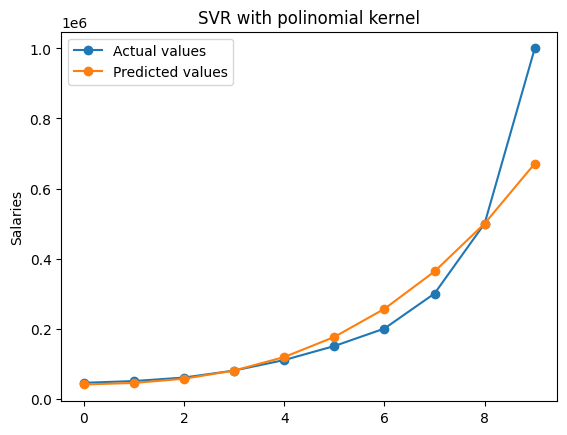

Actual values: 
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]
#####################
Predicted values polinomial kernel:
[40210, 44631, 56631, 80000, 118526, 176000, 256210, 362947, 499999, 671157]
#####################


In [ ]:
plot_actual_and_pred(salaries, output_poly, 'Salaries', 'polinomial kernel')

In [ ]:
param_grid_linear = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [10, 5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['linear']
                    }
svr_linear = make_best_svr(param_grid_linear)
output_linear = svr_linear.predict(inputs)

Best parameters: 
{'C': 50, 'gamma': 10, 'kernel': 'linear'}


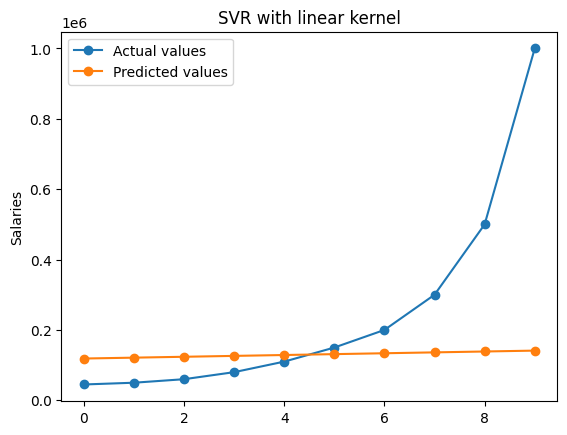

Actual values: 
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]
#####################
Predicted values linear kernel:
[118750, 121250, 123750, 126250, 128750, 131250, 133750, 136250, 138750, 141250]
#####################


In [ ]:
plot_actual_and_pred(salaries, output_linear, 'Salaries', 'linear kernel')

In [ ]:
param_grid_rbf = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [10, 5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['rbf']
                    }
svr_rbf = make_best_svr(param_grid_rbf)
output_rbf = svr_rbf.predict(inputs)

Best parameters: 
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}


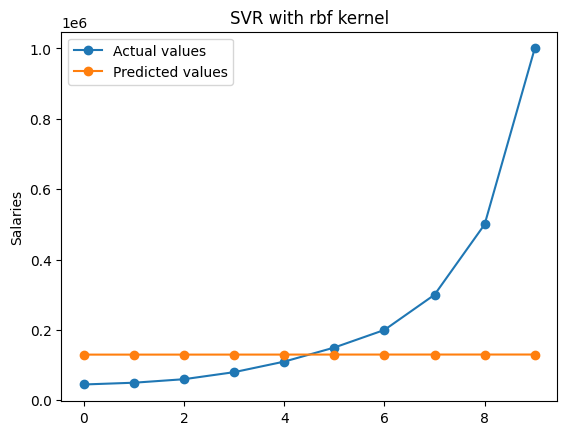

Actual values: 
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]
#####################
Predicted values rbf kernel:
[129873, 129887, 129911, 129942, 129980, 130019, 130057, 130088, 130112, 130126]
#####################


In [ ]:
plot_actual_and_pred(salaries, output_rbf, 'Salaries', 'rbf kernel')

## Analysis of output
As we can view in the above plots, the polinomial kernel suits the dataset well. Values which are predicted by SVR using polinomial kernel are closed to their actual values. However, linear and RBF kernels did poorly on this dataset. The probable reasons are inadequate samples to learn from, and complex intrinsic pattern that exists among points. 

# Part B
In this part, a dataset related to a hotel's costumers is discussed. Attributes mentioned in the dataset are arrival date, number of children and adults, country, and so on. At firt, some preprocessing has been done on the inputs, like normalizing continuous variables, handling missing values, and encoding categorical values using oneHot method. 

In the next step, a SVR is fitted on the train dataset, learning how to predict "Avarage Daily Rate" parameter from the processed input. Model's predictions for y_test are stored in an output csv file. The output file also contains actual y_test values, and their difference from predictions.

In [ ]:
def show_data_frame_info(df, cols):
    for i in range(len(cols)):
        print('\n')
        print(cols[i] + ": " + str(len(df[cols[i]].unique())))
        print(df[cols[i]].unique())

In [ ]:
def label_encoder(feature, dataframe):
    unique_values = dataframe[feature].unique()
    for i in range(len(unique_values)):
        dataframe[feature].replace(unique_values[i], i, inplace = True)
    return dataframe

In [ ]:
def normalize_and_fillna(dataframe):
    cat, num = get_columns_info(dataframe)
    for t in range(len(num)):
      if dataframe[num[t]].isnull().sum() > 0:
          # print(num[t])
          # print("Null values count: ", dataframe[num[t]].isnull().sum())
          men = int(dataframe[num[t]].mean())
          dataframe[num[t]].fillna(value = round(men, 3), inplace = True)
    
    for t in range(len(cat)):
      if dataframe[cat[t]].isnull().sum() > 0:
        # print(cat[t])
        # print("Null values count: ", dataframe[cat[t]].isnull().sum())
        mod = dataframe[cat[t]].mode()
        dataframe[cat[t]].fillna(value = mod, inplace = True)

    for i in range(len(num)):
      dataframe[num[i]] = (dataframe[num[i]] - dataframe[num[i]].mean()) / dataframe[num[i]].std()
    return dataframe

In [ ]:
def oneHot(dataframe, cols):
  one_hot_encoded_data = pds.get_dummies(dataframe, columns = cols)
  return one_hot_encoded_data

In [ ]:
def get_columns_info(dataframe):
    numerics = dataframe._get_numeric_data().columns
    cols = dataframe.columns
    categoricals = []
    for i in range(len(cols)):
        if cols[i] in numerics:
            continue
        else:
            categoricals.append(cols[i])
    # show_data_frame_info(numerics, 'Numerical columns: ')
    # show_data_frame_info(categoricals, 'Categorical columns: ')
    return categoricals, numerics

In [ ]:
uploaded = files.upload()
# df = pds.read_csv('H1.csv')

Saving H1.csv to H1 (1).csv


In [ ]:
df = pds.read_csv(io.BytesIO(uploaded['H1.csv']))
df = df.sample(n = 10000)
y_train = df['ADR']
x_train = df.drop(['ADR', 'ArrivalDateWeekNumber'], axis = 1)
x_train['IsCanceled'] = x_train['IsCanceled'].astype('category')
x_train['ArrivalDateYear'] = x_train['ArrivalDateYear'].astype('category')
x_train['ArrivalDateDayOfMonth'] = x_train['ArrivalDateDayOfMonth'].astype('category')
x_train['IsRepeatedGuest'] = x_train['IsRepeatedGuest'].astype('category')


In [ ]:
x_train = normalize_and_fillna(x_train)

In [ ]:
categorical, numerical = get_columns_info(x_train)

In [ ]:
for i in range(len(categorical)):
  x_train = label_encoder(categorical[i], x_train)

In [ ]:
x_train_one_hotted = oneHot(x_train, categorical)

In [ ]:
# x_train.to_csv('outputt.csv', encoding = 'utf-8-sig') 
# files.download('outputt.csv')

In [ ]:
svr = svm.SVR(kernel = 'rbf', gamma = 0.1, epsilon = 0.1, C = 100)
svr.fit(x_train, y_train)

SVR(C=100, gamma=0.1)

In [ ]:
uploaded_second = files.upload()

Saving H2.csv to H2 (1).csv


In [ ]:
def predict(df_test):
  x_test = df_test.drop(['ADR', 'ArrivalDateWeekNumber'], axis = 1)
  x_test['IsCanceled'] = x_test['IsCanceled'].astype('category')
  x_test['ArrivalDateYear'] = x_test['ArrivalDateYear'].astype('category')
  x_test['ArrivalDateDayOfMonth'] = x_test['ArrivalDateDayOfMonth'].astype('category')
  x_test['IsRepeatedGuest'] = x_test['IsRepeatedGuest'].astype('category')
  x_test = normalize_and_fillna(x_test)
  cat, num = get_columns_info(x_test)
  for i in range(len(cat)):
    x_test = label_encoder(cat[i], x_test)
  y_pred = svr.predict(x_test)
  return y_pred

In [ ]:
df2 = pds.read_csv(io.BytesIO(uploaded_second['H2.csv']))

In [ ]:
pred = predict(df2)

In [ ]:
y_test = df2['ADR']
y_test_array = []
y_pred_array = []
y_diff = []
for i in range(len(y_test)):
    y_test_array.append(y_test.iloc[i])
    y_pred_array.append(round(pred[i], 3))
    y_diff.append(abs(round(y_test.iloc[i] - pred[i], 3)))

In [ ]:
df_res = pds.DataFrame(list(zip(y_pred_array, y_test_array, y_diff)),
               columns =['Y_pred', 'Y_test', 'Difference'])

In [ ]:
df_res.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>